## Fares Joni's Reasearch Questions 
1. BMI of Gender in relation to Tobacco Users
2. Medical charges of Tobacco Users in relation to Age   

 ##### Import data in from clean spreadsheet 

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from Jscripts.project_functions.function import load_and_process
df = load_and_process(r"C:\Users\fares\Documents\GitHub\course-project-group_1015\analysis\Johnny\Medical_Cost.csv")
df.head(10)

,Age,Gender,Children,BMI,Tobacco User,Medical Costs per region,Region
1248,18,female,0,40.0,no,$1633.96,southeast
482,18,female,0,31.0,no,$1622.19,southeast
492,18,female,0,25.0,no,$2196.47,northeast
525,18,female,0,34.0,no,$11482.63,southeast
529,18,male,0,25.0,no,$1708.00,northeast
564,18,female,2,32.0,no,$2801.26,southeast
571,18,female,1,37.0,no,$2219.45,southeast
612,18,female,0,33.0,no,$2207.70,northeast
623,18,male,0,34.0,yes,$34617.84,northeast
1283,18,male,1,30.0,no,$1720.35,southeast


#### Allowing data to read the Medical Costs per region since $ gives error when analyzing

In [55]:
df1 = df.copy()
df1['Medical Costs per region'] = df1['Medical Costs per region'].str.replace('$','')
df1['Medical Costs per region'] = df1['Medical Costs per region'].astype(float)

#### return the info

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 1248 to 635
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1338 non-null   int64  
 1   Gender                    1338 non-null   object 
 2   Children                  1338 non-null   int64  
 3   BMI                       1338 non-null   float64
 4   Tobacco User              1338 non-null   object 
 5   Medical Costs per region  1338 non-null   object 
 6   Region                    1338 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 83.6+ KB


#### Describe the data 

In [4]:
df.describe() #

,Age,Children,BMI
count,1338.000000,1338.000000,1338.000000
mean,39.207025,1.094918,30.663677
std,14.049960,1.205493,6.096007
min,18.000000,0.000000,16.000000
25%,27.000000,0.000000,26.000000
50%,39.000000,1.000000,30.000000
75%,51.000000,2.000000,35.000000
max,64.000000,5.000000,53.000000


#### check for missing values "NA/0" in Data 

In [5]:
df.isnull().sum() 

Age                         0
Gender                      0
Children                    0
BMI                         0
Tobacco User                0
Medical Costs per region    0
Region                      0
dtype: int64

 ####  show columns within Data

In [58]:
df.columns 

Index(['Age', 'Gender', 'Children', 'BMI', 'Tobacco User',
       'Medical Costs per region'],
      dtype='object')

####  calculate correlation between varibles

In [8]:
df.corr() 

,Age,Children,BMI
Age,1.000000,0.042469,0.109527
Children,0.042469,1.000000,0.013915
BMI,0.109527,0.013915,1.000000


#### heatmap to visualize the correlation between functions within the raw data. Numbers close to 1.0 will have a brighter colour.

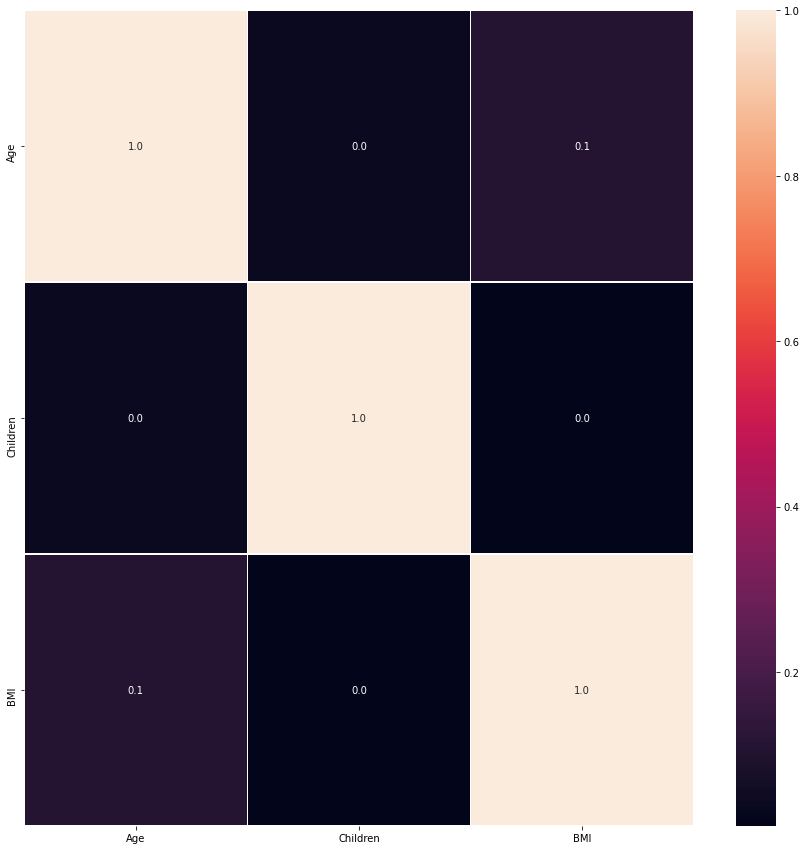

In [9]:
f,ax = plt.subplots(figsize = (15,15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()

#### Heatmap but in winter format that looks cool

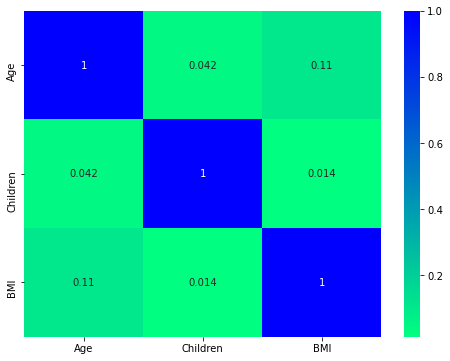

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap="winter_r")
plt.show()

#### Show unique values for each variable

In [101]:
df.nunique(axis=0) 

Age                           47
Gender                         2
Children                       6
BMI                           36
Tobacco User                   2
Medical Costs per region    1337
Region                         4
dtype: int64

#### Displot to show the Age

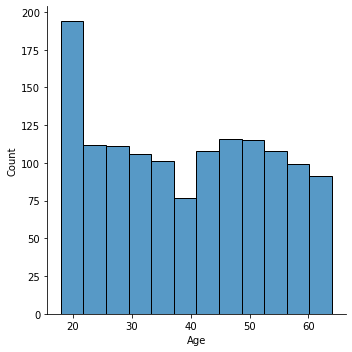

In [102]:
sns.displot(df['Age'])

#### Displot to show the Children

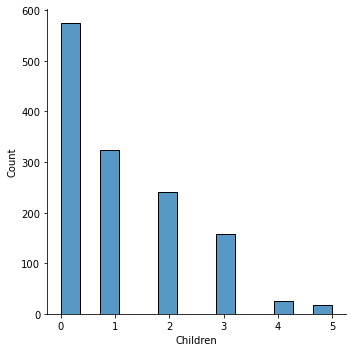

In [12]:
sns.displot(df['Children'])

#### Displot to show the BMI

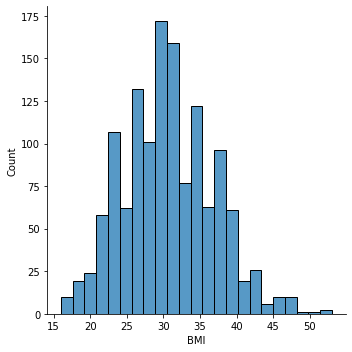

In [61]:
sns.displot(df['BMI'])

#### Barplot to show the Age in comparison to the BMI

<AxesSubplot:xlabel='Age', ylabel='BMI'>

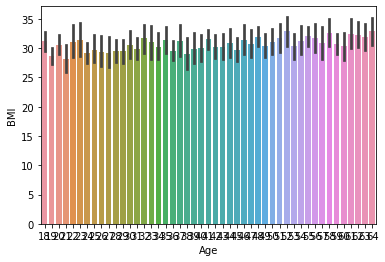

In [62]:
sns.barplot(x = 'Age', y = 'BMI', data = df)

#### Pairplot to show various outcomes

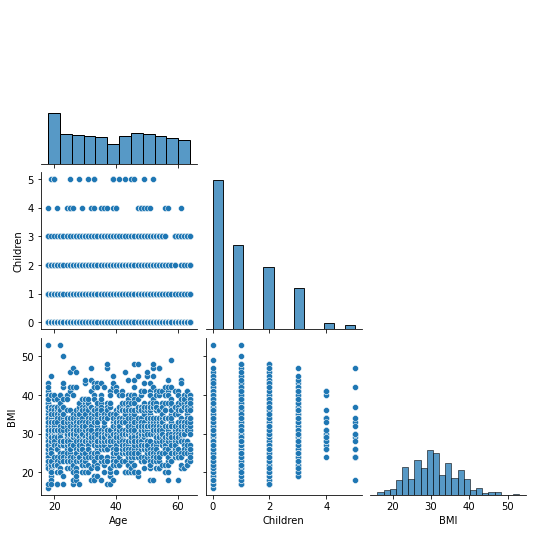

In [16]:
sns.pairplot(data=df.iloc[:,:],corner=True)

#### Lineplot to show the Age and BMI comparison 

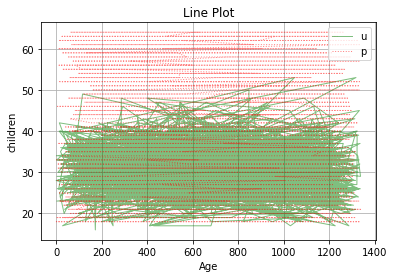

In [21]:
df.BMI.plot(kind='line', color='g', label='BMI', linewidth=1, alpha=0.5, grid=True, linestyle='-')
df.Age.plot(kind='line', color='r', label='Age', linewidth=1, alpha=0.5, grid=True, linestyle=':')
plt.legend('upper left')
plt.xlabel('Age')
plt.ylabel('children')
plt.title('Line Plot')
plt.show()

#### Violinplot to show the Age and Gender comparison in regards to Tobacco Users

<AxesSubplot:xlabel='Gender', ylabel='Age'>

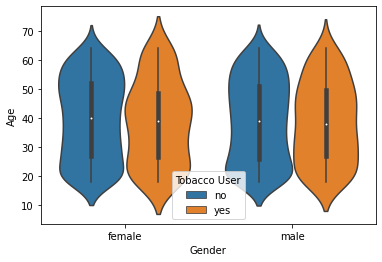

In [27]:
sns.violinplot(data=df,
             y='Age',
             x='Gender',
             hue='Tobacco User')

#### As shown in the above graph, the increase of age leads to an increase in medical costs

#### Boxplot to show the BMI and Medical Costs per region comparison in regards to Tobacco Users

<AxesSubplot:xlabel='Medical Costs per region', ylabel='BMI'>

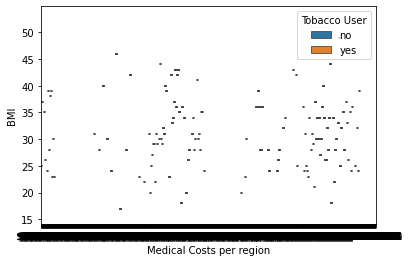

In [44]:
sns.boxplot(data=df,
              y="BMI",
              x="Medical Costs per region",
              hue="Tobacco User")

#### Boxplot to show the BMI and Age

<AxesSubplot:title={'center':'Age'}, xlabel='BMI'>

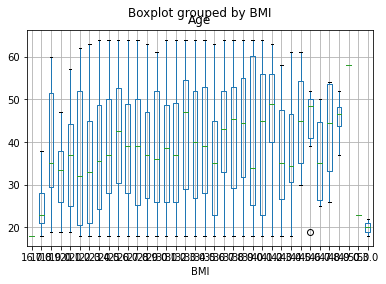

In [65]:
df.boxplot(column='Age',by = 'BMI')

#### Boxplot to show the BMI and Age comparison in regards to Tobacco Users

<AxesSubplot:xlabel='BMI', ylabel='Age'>

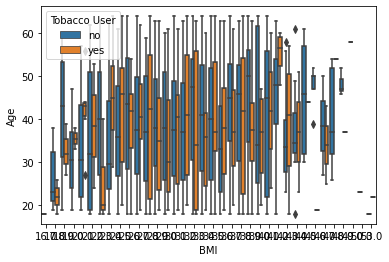

In [30]:
sns.boxplot(data=df,
              y="Age",
              x="BMI",
              hue="Tobacco User")

#### Boxplot to show the Medical Costs per region and Age comparison in regards to Tobacco Users

<AxesSubplot:xlabel='Medical Costs per region', ylabel='Age'>

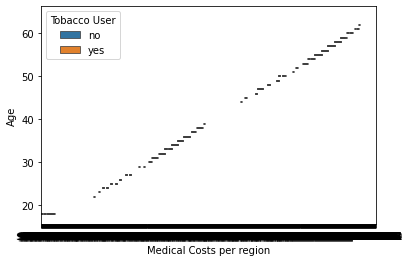

In [93]:
sns.boxplot(data=df,
              y="Age",
              x="Medical Costs per region",
              hue="Tobacco User")

#### Boxplot of Age in regards to having Children  

<AxesSubplot:title={'center':'Age'}, xlabel='Children'>

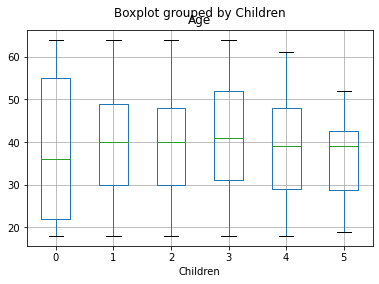

In [83]:
df.boxplot(column='Age',by = 'Children')

#### Histogram to analyze the Age 

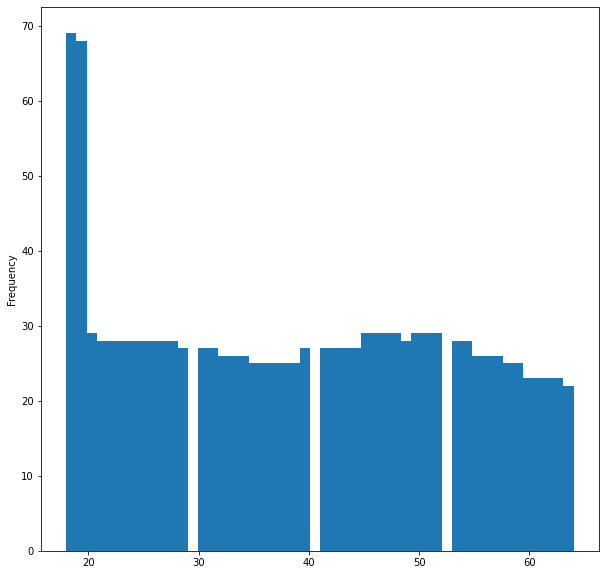

In [76]:
df.Age.plot(kind='hist', bins=50, figsize=(10,10))
plt.show()

#### Cleaning data for Female smokers

In [85]:
df3=(df['Gender']=='female') & (df['Tobacco User']=='yes') & (df['Children']>0)
df[df3]

,Age,Gender,Children,BMI,Tobacco User,Medical Costs per region
1204,18,female,3,27.0,yes,$18223.45
1313,19,female,2,35.0,yes,$36397.58
261,20,female,1,27.0,yes,$17085.27
593,21,female,1,22.0,yes,$15359.10
1021,22,female,3,31.0,yes,$35595.59
...,...,...,...,...,...,...
330,61,female,1,36.0,yes,$48517.56
103,61,female,3,30.0,yes,$30942.19
251,63,female,2,32.0,yes,$47305.31
94,64,female,2,31.0,yes,$47291.06


#### Cleaning data for male smokers

In [87]:
df3=(df['Gender']=='male') & (df['Tobacco User']=='yes') & (df['Children']>0)
df[df3]

,Age,Gender,Children,BMI,Tobacco User,Medical Costs per region
57,18,male,2,32.0,yes,$34303.17
250,18,male,2,17.0,yes,$12829.46
1170,18,male,1,27.0,yes,$17178.68
1026,19,male,1,26.0,yes,$16450.89
105,20,male,1,28.0,yes,$17560.38
...,...,...,...,...,...,...
677,60,male,3,31.0,yes,$46130.53
1284,61,male,1,36.0,yes,$47403.88
475,61,male,1,28.0,yes,$28868.66
1301,62,male,3,31.0,yes,$46718.16


#### The data above shows that there are more Male smokers than female smokers 

#### Renaming Gender and Male to furter analyze

In [39]:
df1=df['Gender']=='female'
df_female=df[df1]
df2=df['Gender']=='male'
df_male=df[df2]
#df3=df['Medical Costs per region']=='charges'
#df_charges=df[df3]

#### historgram to show male BMI's 

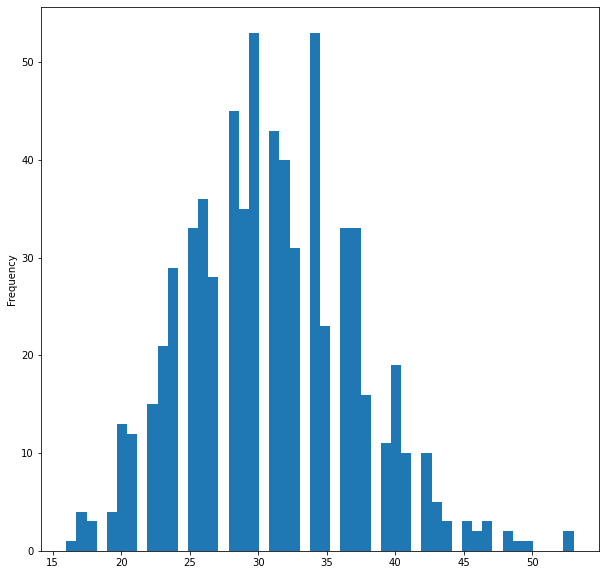

In [40]:
df_male.BMI.plot(kind='hist', bins=50, figsize=(10,10))
plt.show()

In [89]:
#### historgram to show female BMI's 

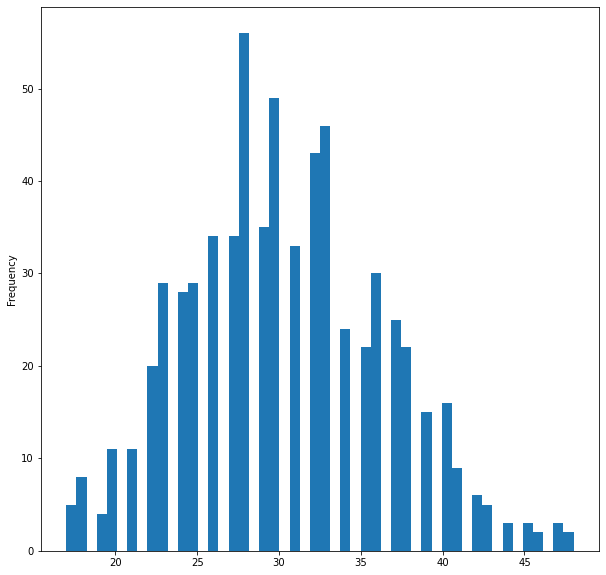

In [88]:
df_female.BMI.plot(kind='hist', bins=50, figsize=(10,10))
plt.show()

#### Females tend to have lower BMI than male BMI's as there are greater number of Male smokers, which lead to a health deficit.